In [9]:
#libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#path to the CSV files
oot_clientes_path = r"data\in\oot_clientes_sample.csv"
oot_requerimientos_path = r"data\in\oot_requerimientos_sample.csv"
train_clientes_path = r"data\in\train_clientes_sample.csv"
train_requerimientos_path = r"data\in\train_requerimientos_sample.csv"

In [3]:
# Releer correctamente los archivos CSV con el separador correcto (",")
oot_clientes_df = pd.read_csv(oot_clientes_path, sep=",")
oot_requerimientos_df = pd.read_csv(oot_requerimientos_path, sep=",")
train_clientes_df = pd.read_csv(train_clientes_path, sep=",")
train_requerimientos_df = pd.read_csv(train_requerimientos_path, sep=",")

# Hacer merge de las bases de clientes con requerimientos por ID_CORRELATIVO
train_merged_df = pd.merge(train_clientes_df, train_requerimientos_df, on=["ID_CORRELATIVO", "CODMES"], how="left")
oot_merged_df = pd.merge(oot_clientes_df, oot_requerimientos_df, on=["ID_CORRELATIVO", "CODMES"], how="left")


train_merged_df.shape, oot_merged_df.shape

((57783, 57), (14458, 56))

In [4]:
nulls = train_merged_df.isnull().sum()
nulls = nulls[nulls > 0].sort_values(ascending=False)

# Mostrar con porcentaje
total = len(train_merged_df)
nulls_df = pd.DataFrame({
    'Columna': nulls.index,
    'Nulos': nulls.values,
    'Porcentaje (%)': (nulls.values / total * 100).round(2)
})

print(nulls_df)

               Columna  Nulos  Porcentaje (%)
0          SUBMOTIVO_2  49807           86.20
1  PRODUCTO_SERVICIO_2  49807           86.20
2             DICTAMEN  49807           86.20
3  TIPO_REQUERIMIENTO2  49807           86.20
4         RANG_INGRESO   7584           13.12
5                 EDAD   4271            7.39
6  FLAG_LIMA_PROVINCIA   2736            4.73
7           ANTIGUEDAD   1445            2.50


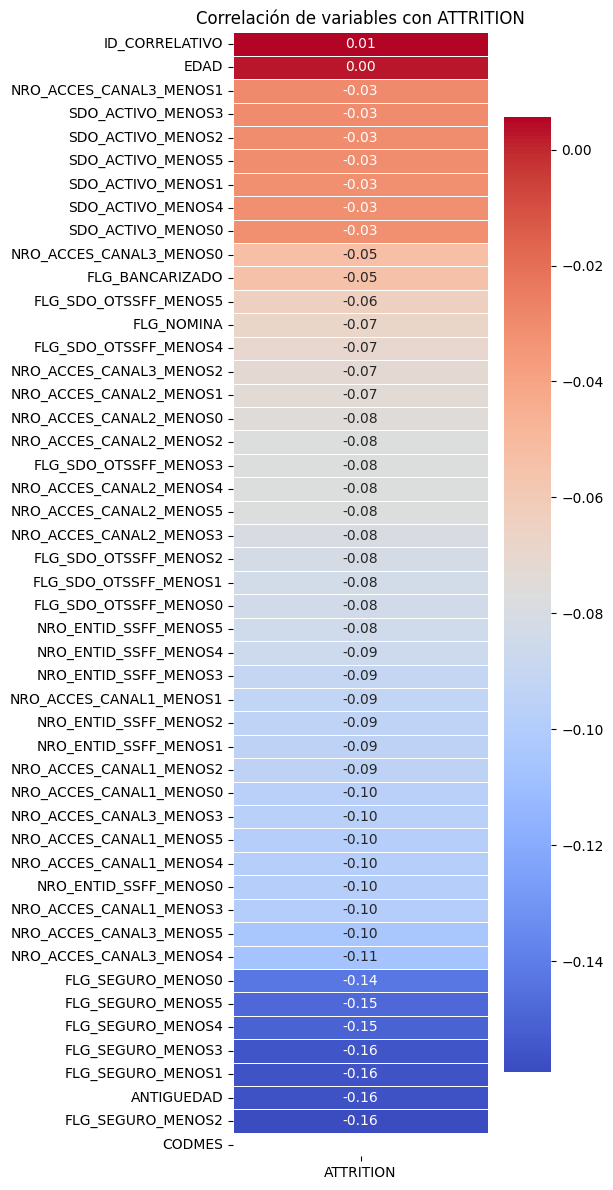

In [17]:
#correlación de variables numéricas con ATTRITION
corr = train_clientes_df.select_dtypes(include="number").corr()

# Filtrar solo correlación con ATTRITION
attr_corr = corr[["ATTRITION"]].drop("ATTRITION").sort_values("ATTRITION", ascending=False)

# Heatmap enfocado en ATTRITION
plt.figure(figsize=(6, 12))
sns.heatmap(attr_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlación de variables con ATTRITION")
plt.tight_layout()
plt.show()